categories
rub                  5.000000
burrito              5.000000
emeril lagasse       5.000000
sourdough            5.000000
suzanne goin         5.000000
las vegas            5.000000
wasteless            5.000000
mortar and pestle    5.000000
yonkers              5.000000
grappa               4.687500
omelet               4.687500
rosé                 4.531250
cambridge            4.531250
indiana              4.500000
ireland              4.464286
Name: rating, dtype: float64


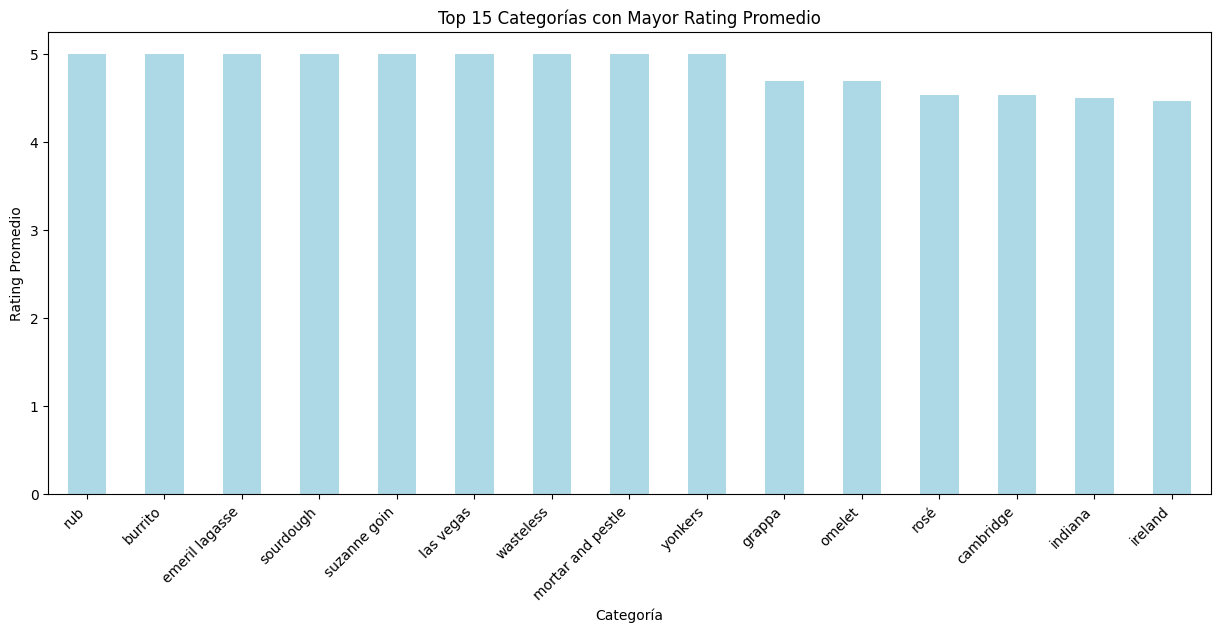

In [1]:
import pandas as pd
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_json("full_format_recipes.json")

# Convertir la columna categories de texto a listas
data["categories"] = data["categories"].fillna("")  # Asegura que no haya valores nulos
#print(data["categories"].head())

# Convertir las categorías en listas
data["categories"] = data["categories"].apply(lambda x: re.sub(r"[^\w\s,]", "", str(x)).split(','))

# Limpiar las categorías
data["categories"] = data["categories"].apply(lambda x: [cat.strip().lower() for cat in x])

# Descomponer las listas de categorías en filas separadas
exploded_data = data.explode("categories")

# Agrupar por cada categoría y calcular la media del rating
category_ratings = exploded_data.groupby("categories")["rating"].mean().sort_values(ascending=False)

# Mostrar las 10 categorías con el mayor rating promedio
print(category_ratings.head(15))


# Graficar las categorías con el mayor rating promedio
plt.figure(figsize=(15, 6))
category_ratings.head(15).plot(kind="bar", color="lightblue")
plt.title("Top 15 Categorías con Mayor Rating Promedio")
plt.xlabel("Categoría")
plt.ylabel("Rating Promedio")
plt.xticks(rotation=45, ha="right")
plt.show()